<a href="https://colab.research.google.com/github/vaishnavipatil29/Career-Guidance-ML-Project/blob/master/PRML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
#df=pd.read_csv("career_pred.csv")
url='https://raw.githubusercontent.com/vaishnavipatil29/Career-Guidance-ML-Project/master/career_pred.csv'
df = pd.read_csv(url)
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,job,SAaS services,yes,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no,yes,no,python,data science,yes,no,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [5]:
# Data
data = df.iloc[:,:-1].values
label = df.iloc[:,-1]

In [6]:
#Label Encoding: COnverting To Numeric values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

for i in range(14,38):
    data[:,i] = labelencoder.fit_transform(data[:,i])

#Normalizing the data
from sklearn.preprocessing import Normalizer
data1=data[:,:14]
normalized_data = Normalizer().fit_transform(data1)

data2=data[:,14:]
df1 = np.append(normalized_data,data2,axis=1)


In [7]:
#Combining into a dataset
df2=df.iloc[:,:-1]
dataset = pd.DataFrame(df1,columns=df2.columns)
dataset

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert
0,0.28509,0.260299,0.322276,0.359461,0.388383,0.388383,0.359461,0.347066,0.252036,0.0371856,0.016527,0,0.016527,0.0330539,1,1,1,8,0,0,1,0,0,4,4,0,8,0,0,21,1,0,1,0,0,0,1,0
1,0.34998,0.278189,0.327545,0.269215,0.318571,0.314085,0.327545,0.376901,0.40831,0.0538431,0.0314085,0.00448692,0.00897384,0.0134608,1,0,1,5,2,0,0,2,1,7,0,1,4,1,1,5,1,1,0,1,0,0,0,1
2,0.295012,0.357339,0.378115,0.361494,0.253461,0.336563,0.299168,0.299168,0.39058,0.0457062,0.0041551,0.0166204,0.0041551,0.0124653,1,0,1,0,7,0,1,2,0,6,2,0,5,1,1,29,0,0,1,0,1,0,0,1
3,0.328025,0.375503,0.258967,0.362554,0.384135,0.315077,0.2676,0.379819,0.297812,0.0302129,0.00431612,0.00431612,0.00863224,0.0215806,0,1,0,6,1,1,0,1,0,7,5,0,7,0,0,23,0,1,0,0,1,1,1,1
4,0.397157,0.267649,0.388523,0.289234,0.306502,0.384206,0.315136,0.306502,0.315136,0.0172677,0.0215846,0.0172677,0.0259016,0.0129508,0,0,0,0,0,0,0,2,0,0,5,0,9,0,1,7,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.366575,0.29591,0.273827,0.278244,0.357742,0.326826,0.397491,0.370992,0.304743,0.0176663,0.00883314,0.0264994,0.00441657,0.0353326,1,0,0,0,0,1,0,2,0,3,4,1,7,0,1,17,0,1,1,0,0,1,1,0
19996,0.34342,0.2962,0.356299,0.37347,0.352006,0.283322,0.283322,0.394933,0.287615,0.0300493,0.034342,0,0.0386348,0.034342,1,0,0,2,3,0,1,1,0,2,0,0,3,1,1,7,1,0,1,0,0,0,0,1
19997,0.343084,0.289348,0.330683,0.359618,0.264546,0.351351,0.285214,0.388553,0.363751,0.0289348,0.0124006,0.0248012,0.00826707,0.0124006,1,1,1,4,2,1,1,1,0,7,1,0,4,1,1,10,0,1,0,1,1,0,0,1
19998,0.294792,0.377161,0.394502,0.381496,0.286122,0.320804,0.264446,0.377161,0.264446,0.0216759,0.00433518,0.0173407,0.0390166,0.0216759,0,0,0,2,0,0,1,2,2,1,5,1,1,1,0,29,0,0,0,0,1,1,1,0


In [8]:
# For label
label = df.iloc[:,-1]
original=label.unique() 
label=label.values
label2 = labelencoder.fit_transform(label)
y=pd.DataFrame(label2,columns=["Suggested Job Role"])
numeric=y["Suggested Job Role"].unique() 
Y = pd.DataFrame({'Suggested Job Role':original, 'Associated Number':numeric})

In [9]:
Y

,Suggested Job Role,Associated Number
0,Database Developer,7
1,Portal Administrator,18
2,Systems Security Administrator,28
3,Business Systems Analyst,2
4,Software Systems Engineer,25
5,Business Intelligence Analyst,1
6,CRM Technical Developer,4
7,Mobile Applications Developer,14
8,UX Designer,32
9,Quality Assurance Associate,21


# Decision Tree

Dependent Variable: Categorical 
    
Independent Variable : Categorical and Continous
    
Used to classify records in a pictorial format with the help of gini index

Random Forest Technique is used to find the accuracy and important features to be used while implementing Decision Tree.

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)
X=dataset.copy()
rf_model.fit(X,df['Suggested Job Role'])
print("OOB Accuracy")
print(rf_model.oob_score_)

OOB Accuracy
0.0421


In [11]:
feature = X.columns
imp=np.empty(len(feature))
i=0
for feat,imp_val in zip(feature,rf_model.feature_importances_):
    #print(feature,imp)
    imp[i]=imp_val
    i=i+1

indices = np.argsort(imp)

for i in indices:
    print(feature[i],imp[i])


Taken inputs from seniors or elders 0.012526986674559988
hard/smart worker 0.012734631992113454
In a Realtionship? 0.012824434488487801
Management or Technical 0.012827947629580332
Salary Range Expected 0.012958493035120259
worked in teams ever? 0.01303247540274887
self-learning capability? 0.01311479268535878
interested in games 0.013123312181191716
Salary/work 0.013211947336152321
talenttests taken? 0.013214312295705508
Introvert 0.013221418778646124
Job/Higher Studies? 0.01328394039125629
Gentle or Tuff behaviour? 0.01333644359895035
can work long time before system? 0.013355266346676697
Extra-courses did 0.013384398005023649
olympiads 0.013448500357625705
reading and writing skills 0.019656469742627324
memory capability score 0.020037193318279814
interested career area  0.027719514860610424
workshops 0.030367007270364437
certifications 0.031151481293306672
Type of company want to settle in? 0.03184363278210286
Interested subjects 0.03186878240545834
Interested Type of Books 0.03687

Since all values are almost close, we can not eliminate any one of the features.

In [12]:
#Decision Tree Classifier

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [14]:
DT_model = tree.DecisionTreeClassifier()
DT_model = DT_model.fit(X_train, y_train)
DT_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
#Generate Decision Tree Graph
features=['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expected',
       'In a Realtionship?', 'Gentle or Tuff behaviour?',
       'Management or Technical', 'Salary/work', 'hard/smart worker',
       'worked in teams ever?', 'Introvert']
with open('Dtree3.dot','w') as f:
    f=tree.export_graphviz(DT_model,feature_names=features,out_file=f)

In [16]:
r=tree.export_text(DT_model,feature_names=features)
print(r)

|--- Percentage in Electronics Subjects <= 0.44
|   |--- percentage in Algorithms <= 0.44
|   |   |--- percentage in Algorithms <= 0.44
|   |   |   |--- Acedamic percentage in Operating Systems <= 0.44
|   |   |   |   |--- coding skills rating <= 0.04
|   |   |   |   |   |--- percentage in Algorithms <= 0.39
|   |   |   |   |   |   |--- public speaking points <= 0.04
|   |   |   |   |   |   |   |--- Percentage in Electronics Subjects <= 0.31
|   |   |   |   |   |   |   |   |--- Logical quotient rating <= 0.00
|   |   |   |   |   |   |   |   |   |--- Acedamic percentage in Operating Systems <= 0.37
|   |   |   |   |   |   |   |   |   |   |--- public speaking points <= 0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- public speaking points >  0.04
|   |   |   |   |   |   |   |   |   |   |   |--- class: 14
|   |   |   |   |   |   |   |   |   |--- Acedamic percentage in Operating Systems >  0.37
|   |   |   |   

In [17]:
# Prediction
y_pred = DT_model.predict(X_test)
y_test_arr=y_test['Suggested Job Role']
Final = pd.DataFrame({'Predicted':y_pred, 'Actual':y_test_arr})
Final.reset_index()

,index,Predicted,Actual
0,19778,14,24
1,4376,6,24
2,10188,6,10
3,9887,18,5
4,4441,5,9
...,...,...,...
3995,13123,13,20
3996,18706,12,17
3997,7274,14,25
3998,16155,3,0


In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("accuracy=",accuracy*100)

accuracy= 2.9250000000000003


In [19]:
#Number of correct predicted
comparison_column = np.where(Final['Predicted'] == Final['Actual'], 1, 0)
Number_of_correct_predictions=list(comparison_column).count(1)
print("Number_of_correct_predictions : ",((Number_of_correct_predictions)/4000)*100,"%")
accuracy_DT=Number_of_correct_predictions

Number_of_correct_predictions :  2.9250000000000003 %


In [20]:
y_train=y_train['Suggested Job Role']
y_train

18660    16
10831     4
5511     28
3543     11
12340     3
         ..
9372     31
7291     19
17728     5
7293      6
17673    31
Name: Suggested Job Role, Length: 16000, dtype: int64

# Support Vector Machine

In [21]:
# Run svm with default hyper parameters
# Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with default hyperparameters: 5.6000


In [ ]:
# Run svm with default hyper parameters
# Default hyperparameter means C=1.0, kernel=linear and gamma=auto among other parameters
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC(kernel='linear') 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# XGBOOST

In [26]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

X_train=pd.to_numeric(X_train.values.flatten())
X_train=X_train.reshape((16000,38))
X_test=pd.to_numeric(X_test.values.flatten())
X_test=X_test.reshape((4000,38))

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train['Suggested Job Role'])


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.0425


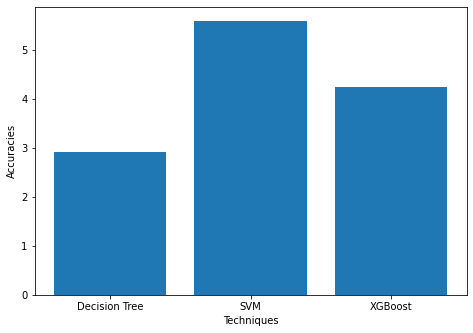

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Name = ['Decision Tree', 'SVM', 'XGBoost']
accuracies = [2.925,5.6,4.25]
ax.bar(Name,accuracies)
ax.set_ylabel('Accuracies')
ax.set_xlabel('Techniques')
plt.show()

So, SVM has highest Accuuracy and hence is best suited.